## Group 19 Project Proposal

Title: Stellar Classification Data

#### **Introduction** 

Our project leverages the Sloan Digital Sky Survey's seventeenth release (SDSS17), which includes a Stellar Classification Dataset with over 100,000 celestial observations, to distinguish between stars, galaxies, and quasars based on their spectral properties. Each type of celestial body has a distinct spectral signature: stars shine with a steady light, galaxies emit light from vast star collections, and quasars emit intense energy from supermassive black holes. By accurately classifying these entities, we gain a better understanding of the universe's structure and evolutionary processes.

**Question:** Can we predict whether a stellar object is a star, a galaxy, or a quasar based on their photometric ratios and redshifts?

Our data set comes from Kaggle and explores the classification of celestial objects into stars, galaxies, and quasars.
The variables for this dataset include observed characteristics of the object's electromagnetic radiation, its unique identifier, and identification labels of each observation.

Research has proven **color indices** and **photometric redshifts** to be good metrics for celestial object classification (Wolf et al., 2017). Color indices (u-g, g-r, r-i, and i-z) are the differences between the magnitudes of the object in two different filters, representing the object's color. They help to reveal the physical properties of celestial objects (Elting et al., 2018). The redshift value is based on increases in radiation wavelength and points to an object's lifetime and motion.

**References:** 

fedesoriano. (2022). Stellar Classification Dataset - SDSS17. Kaggle.com. https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data

Wolf, C., Meisenheimer, K., Kleinheinrich, M., Borch, A., Dye, S., Gray, M., Wisotzki, L., Bell, E., Rix, H., Cimatti, A., Hasinger, G., & Szokoly, G. (2004). A catalogue of the Chandra Deep Field South with multi-colour classification and photometric redshifts from COMBO-17. Astronomy and Astrophysics, 421, 913-936. https://doi.org/10.1051/0004-6361:20040525.

Elting, C., C. Bailer-Jones, & Smith, K. (2018). Photometric Classification of Stars, Galaxies and Quasars in the Sloan Digital Sky Survey DR6 Using Support Vector Machines. https://www.semanticscholar.org/paper/Photometric-Classification-of-Stars%2C-Galaxies-and-Elting-Bailer-Jones/7e880193b3a75c789c7352dd65743666af8e4dab

#### **Preliminary exploratory data analysis** 

We first install and load the necessary packages for explanatory analysis.

In [29]:
library(rvest)
library(tidyverse)
library(tidymodels)
library(tidyr)
library(dplyr)
library(ggplot2)

We read in our dataset from Kaggle:

In [30]:
URL <- 'https://raw.githubusercontent.com/jasukej/dsci-100-2024w2-group-19/main/data/star_classification.csv'
raw_data <- read_csv(URL)
glimpse(raw_data)

Rows: 100000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): class
dbl (17): obj_ID, alpha, delta, u, g, r, i, z, run_ID, rerun_ID, cam_col, fi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 100,000
Columns: 18
$ obj_ID      <dbl> 1.237661e+18, 1.237665e+18, 1.237661e+18, 1.237663e+18, 1.…
$ alpha       <dbl> 135.689107, 144.826101, 142.188790, 338.741038, 345.282593…
$ delta       <dbl> 32.4946318, 31.2741849, 35.5824442, -0.4028276, 21.1838656…
$ u           <dbl> 23.87882, 24.77759, 25.26307, 22.13682, 19.43718, 23.48827…
$ g           <dbl> 22.27530, 22.83188, 22.66389, 23.77656, 17.58028, 23.33776…
$ r           <dbl> 20.39501, 22.58444, 20.60976, 21.61162, 16.49747, 21.32195…
$ i           <dbl> 19.16573, 21.16812, 19.34857, 20.50454, 15.97711, 20.25615…
$ z           <dbl> 18.79371, 21.61427, 18.94827, 19.25010, 15.54461, 19.54544…
$ run_ID      <dbl> 3606, 4518, 3606, 4192, 8102, 8102, 7773, 7773, 3716, 5934…
$ rerun_ID    <dbl> 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301, 301…
$ cam_col     <dbl> 2, 5, 2, 3, 3, 3, 2, 2, 5, 4, 3, 4, 2, 2, 3, 4, 5, 5, 5, 5…
$ field_ID    <dbl> 79, 119, 120, 214, 137, 110, 462, 346, 108, 122, 27, 112, …
$ spec_obj_ID 

In [31]:
# Counting number of NA values
null_counts <- raw_data |>
               summarise(across(everything(), ~sum(is.na(.)))) |>
               pivot_longer(obj_ID:fiber_ID, names_to = "variable", values_to = "NA counts")
null_counts

variable    NA counts
1  obj_ID      0        
2  alpha       0        
3  delta       0        
4  u           0        
5  g           0        
6  r           0        
7  i           0        
8  z           0        
9  run_ID      0        
10 rerun_ID    0        
11 cam_col     0        
12 field_ID    0        
13 spec_obj_ID 0        
14 class       0        
15 redshift    0        
16 plate       0        
17 MJD         0        
18 fiber_ID    0

The dataset is tidy and contains no null values. We remove all duplicate observations with the same spec_obj_ID, as they refer to the same celestial object. Based on the literature review, we will mutate the data to **display color indices in order of the electromagnetic radiation spectrum**. To fit the data with our analysis, we establish the 'class' as a categorical variable, and select only the relevant variables to our classification problem.

In [32]:
# Select relevant variables and mutate for color indices
celestial <- raw_data |>
                    distinct(spec_obj_ID, .keep_all = TRUE) |>
                    mutate(u_g = u - g,     # Ultraviolet - Green
                           g_r = g - r,     # Green - Red
                           r_i = r - i,     # Red - Near Infrared
                           i_z = i - z)  |> # Near Infrared - Infrared 
                    select(class, u_g, g_r, r_i, i_z, redshift) |>
                    mutate(class = as_factor(class))
                    
head(celestial)

class  u_g      g_r     r_i     i_z      redshift 
1 GALAXY  1.60352 1.88029 1.22928  0.37202 0.6347936
2 GALAXY  1.94571 0.24744 1.41632 -0.44615 0.7791360
3 GALAXY  2.59918 2.05413 1.26119  0.40030 0.6441945
4 GALAXY -1.63974 2.16494 1.10708  1.25444 0.9323456
5 GALAXY  1.85690 1.08281 0.52036  0.43250 0.1161227
6 QSO     0.15051 2.01581 1.06580  0.71071 1.4246590

Let's now split the data for training and testing.

In [35]:
data_split <- initial_split(celestial, prop = 0.75, strata = class)
training_data <- training(data_split)
testing_data <- testing(data_split)

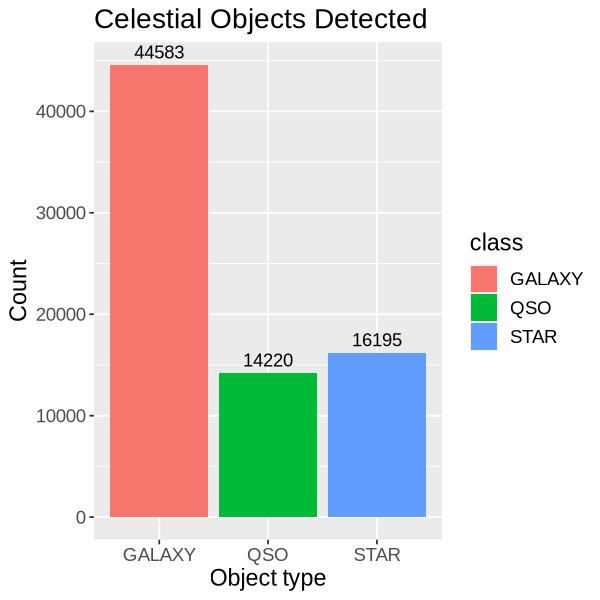

In [36]:
# Finding distribution of classes
options(repr.plot.height = 5, repr.plot.width = 5)
training_count <- training_data |> group_by(class) |> summarize(count = n()) 

training_count_plot <- training_count |> 
                        ggplot(aes(x = class, y = count, fill = class)) + 
                        geom_bar(stat = "identity") + 
                        geom_text(aes(label = count), vjust = -0.5, position = position_dodge(width = 0.9)) +
                        labs(x = "Object type", y = "Count") +
                        ggtitle("Celestial Objects Detected") + 
                        theme(text = element_text(size = 14))
training_count_plot

From this plot, we see that our training data is **uneven** and must be **upscaled** when training our algorithm. 

In [37]:
# Identify abnormalities in distribution
training_data |> filter(i_z > 10000)

class u_g g_r r_i i_z redshift

In [38]:
training_data <- training_data |> filter(i_z < 10000)

We will remove one abnormality in our distribution.

Next, we compute the summary statistics for our predictors:

In [39]:
# Table for Maximum Values
max_table <- training_data |>
    group_by(class) |>
    summarize(across(c(u_g, g_r, r_i, i_z, redshift), 
                   ~ max(., na.rm = TRUE), 
                   .names = "max_{.col}"))

# Table for Minimum Values
min_table <- training_data |>
    group_by(class) |>
    summarize(across(c(u_g, g_r, r_i, i_z, redshift), 
                   ~ min(., na.rm = TRUE), 
                   .names = "min_{.col}"))

# Table for Median Values
mean_table <- training_data |>
    group_by(class) |>
    summarize(across(c(u_g, g_r, r_i, i_z, redshift), 
                   ~ mean(., na.rm = TRUE), 
                   .names = "mean_{.col}"))

max_table
min_table
mean_table

class  max_u_g  max_g_r  max_r_i  max_i_z  max_redshift
1 GALAXY  9.03522 14.31517 10.73043  8.27322 1.995524000 
2 QSO    18.62495  7.15157  5.98677 12.54655 7.011245000 
3 STAR   11.24137 10.38554 12.20580 13.42710 0.004153254

class  min_u_g   min_g_r   min_r_i   min_i_z   min_redshift 
1 GALAXY -12.74814 -12.31861 -12.37881 -10.42510 -0.0099706670
2 QSO     -5.96729  -4.61545 -13.98412  -6.57281  0.0004606231
3 STAR    -6.51239  -9.56729  -7.68356  -9.88579 -0.0041360780

class  mean_u_g  mean_g_r  mean_r_i  mean_i_z  mean_redshift
1 GALAXY 1.6778154 1.3200712 0.7350341 0.4035937  0.4227125918
2 QSO    0.6208517 0.3007699 0.1932807 0.1623852  1.7149532913
3 STAR   1.5355404 0.6721409 0.4055408 0.2120312 -0.0001139719

The summary statistics show distinct differences between the mean predictor values between classes. The max and min values verify that there are no longer any problematic outliers in the data. 

To validate our selection of predictor variables, we plot the distribution of the predictor values corresponding to each class:

In [40]:
# Pivot to display predictors beside the class
predictor_distribution <- pivot_longer(training_data, -class, names_to = "predictor", values_to = "value")

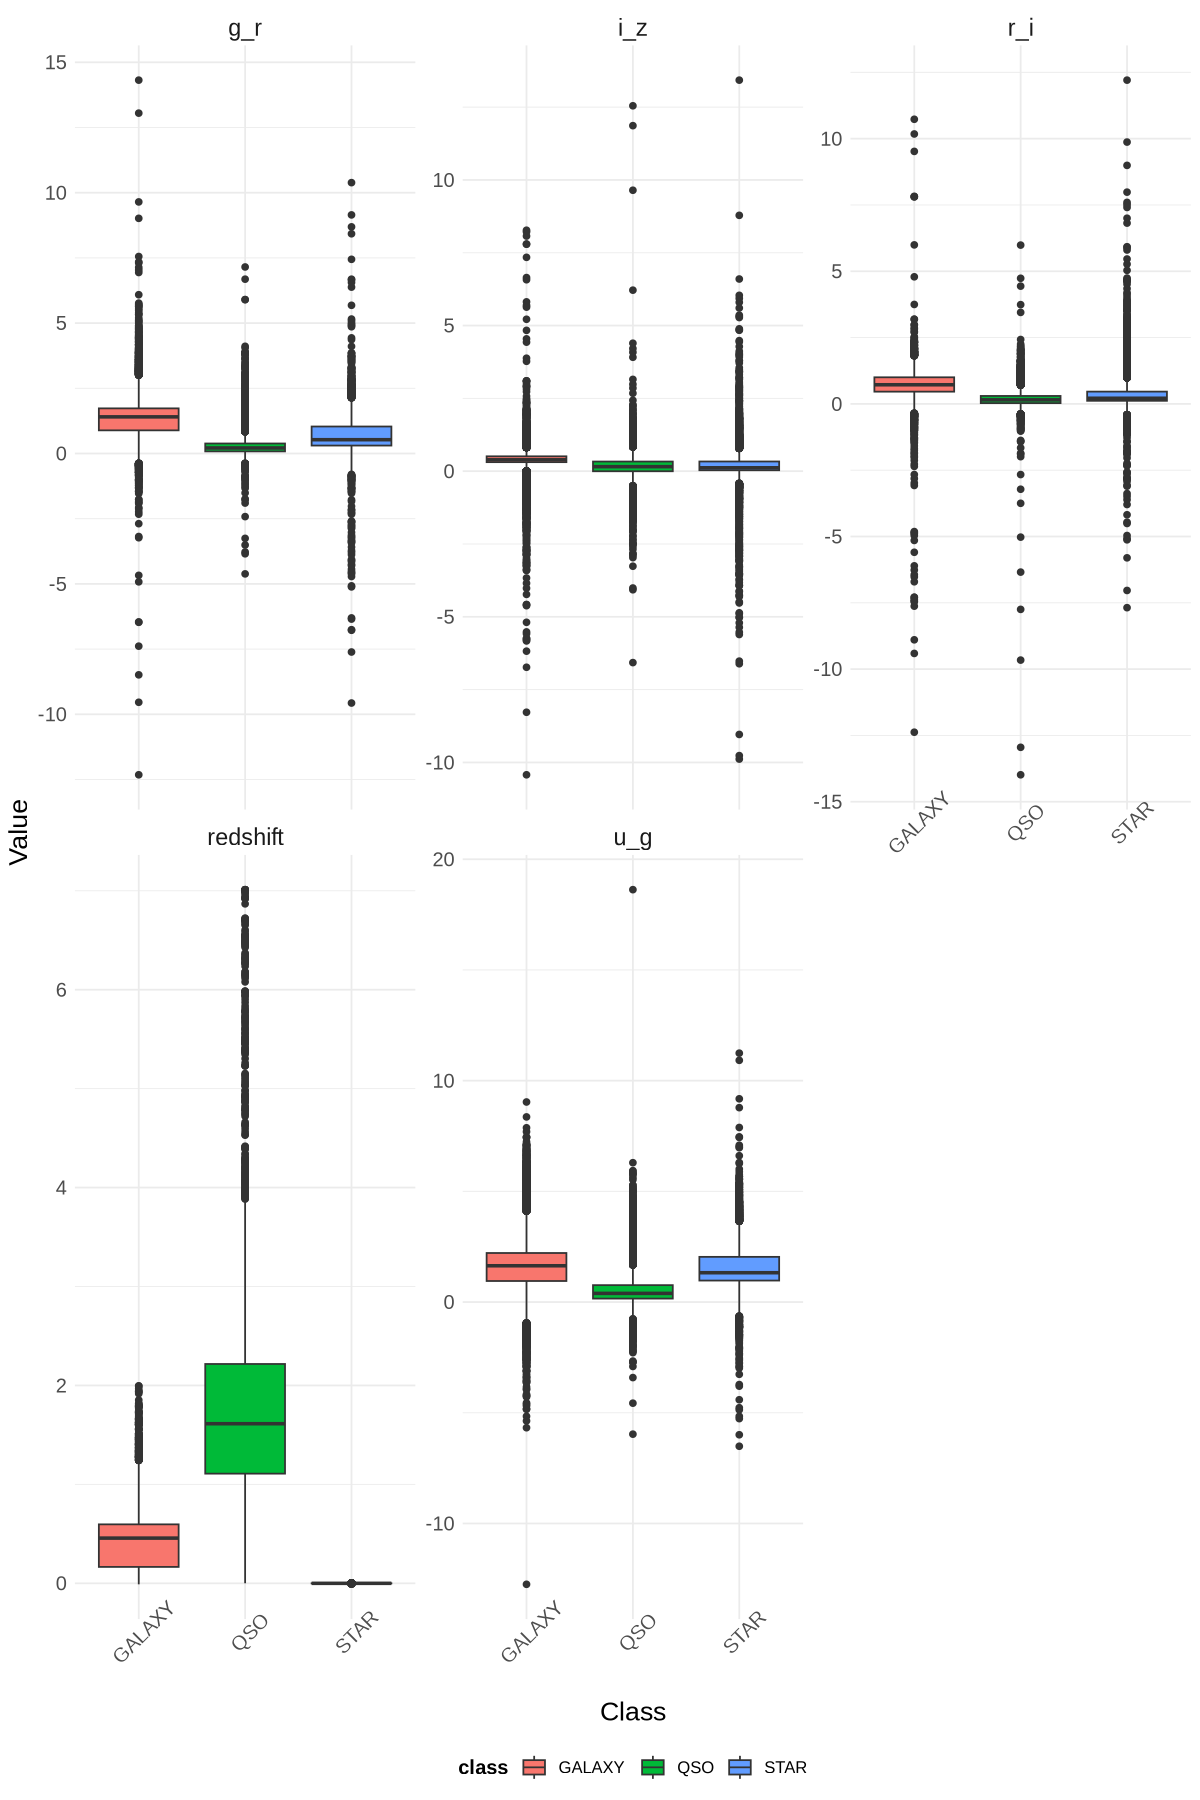

In [41]:
options(repr.plot.width = 10, repr.plot.height = 15)

# Plotting each distribution
training_boxplots <- ggplot(predictor_distribution, aes(x = class, y = value, fill = class)) + 
                        geom_boxplot() +  
                        facet_wrap(~ predictor, scales = "free_y") +  # Each predictor is its own plot
                        labs(y = "Value", x = "Class") + 
                        theme_minimal() +
                        theme(plot.title = element_text(size = 18, face = "bold"),
                              axis.title = element_text(size = 16),
                              axis.text = element_text(size = 12), 
                              axis.text.x = element_text(angle = 45, size = 12),
                              strip.text = element_text(size = 14),
                              legend.title = element_text(size = 12, face = "bold"),
                              legend.text = element_text(size = 10),
                              legend.position = "bottom")
training_boxplots

Despite some overlap in the color indices, the distribution of predictor values for each class is **distinct** when compounded with the redshift values. 

#### **Methods**

We will be conducting our analysis by creating the **K-nearest neighbors** classification algorithm. We will use the variables **u_g**, **g_r**, **r_i**, **i_z**, and **redshift** as predictor variables, and **class** as the response variable. Our aim is to predict the type of a celestial object based on their color ratios and photometric redshifts.

We will visualize our results using a **confusion matrix**, which displays the number of correct and incorrect predictions across different classes (e.g., Galaxy, Star, Quasar). By representing the results as a matrix, we can easily identify where the model performs well and where it makes errors.

#### **Expected outcomes and significance**

We expect to classify objects as stars, galaxies, and quasars in ascending order corresponding to their redshift values. We expect to accurately classify the celestial objects based on their color indices and redshift values. 

The significance of our expected outcomes can streamline the classification of celestial objects, for which data is continuously updated on a large scale. Our analysis could lead to future questions such as "_Can we identify new subclasses of galaxies, stars, or quasars based on subtle variations in their color indices and redshifts?_"